# Clustering of Neighbourhoods - Hyderabad, India

## Table of Contents

- [Introduction](#Introduction)
- [Business Problem](#Business-Problem)
- [Data Requirement](#Data-Requirement)
- [Methodology](#Methodology)
- [Results & Discussion](#Results)
- [Conclusion](#Conclusion)

## Introduction <a class="anchor" id="Introduction"></a>

<p style='text-align: justify;'> Hyderabad is one of the three popular cities in southern part fo India. This is the city where global conglomerates such as Microsoft, Google, IBM, Facebook, Amazon, etc had set up their offices. There are more than 1000 IT firms established in this city. Apart from being an IT powerhouse, Hyderabad is also a manufacturing city with establishments such as BHEL, DRDO, NMDC, HAL, etc. Haivng such a huge number of firms and industries located in and around Hyderabad, this city attracts many people from various parts of India. The population of this city is ever-growing at a pace of around 2.9 % annually. Currently, the cities population is close to 10 millions and is still increasing. Owing to this increasing population in the city, there is a large scope to set up businesses like, shopping malls, hotels, restaurants, coffee shops, departmental stores, etc.</p>

## Business Problem <a class="anchor" id="Business-Problem"></a>

<p style='text-align: justify;'>The objective of this project is to analyze the neighbourhoods in the Hyderabad city and segregate them into different clusters based on the popular venues at each neighbourhood, by using <b>data science methodology</b> and <b>machine learning techniques</b> like <b>clustering</b>. This project aims to help small business owners to select a suitable cluster to set up their businesses like hotels, restaurants, shopping malls, etc. <br/>
The <b>target audience</b> of this project are investors & developers who wish to construct shopping malls, hotels, etc., and small business owners who want to set up their businesses like restaurants, coffee shops, departmental stores, etc. It would help them to find suitable location to set up their business based on its category</p>

Hyderabad city has many neighbourhoods. In order to solve the business problem of this project, the following data is required.
1. <b>List of neighbourhoods in Hyderabad:</b> The list of neighbourhoods in Hyderabad can be obtained from Wikipedia's page [https://en.wikipedia.org/w/index.php?title=Category:Neighbourhoods_in_Hyderabad,_India&pageuntil=Sikh+Village#mw-pages] 
2. <b> Latitudes \& Longitudes of Neighbourhoods:</b> The latitude and longitude coordinates of each neighbourhood can be obtained by using Python Geocoder package
3. <b>List of Venues:</b> The list of venues in each neighbourhood along with venue details like its latitude, longitude and category, by using FourSquare API. [https://developer.foursquare.com/docs/places-api/]

#### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import geocoder
import requests
import json
import folium
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from selenium import webdriver
driver = webdriver.Firefox(executable_path=r'C:\Users\Administrator\Downloads\geckodriver.exe')
import os
import time
from IPython.display import Image
print('All the required libraries are imported')

All the required libraries are imported


## Data Requirement <a class="anchor" id="Data-Requirement"></a>

Hyderabad city has many neighbourhoods. In order to solve the business problem of this project, the following data is required.
1. <b>List of neighbourhoods in Hyderabad:</b> The list of neighbourhoods in Hyderabad can be obtained from Wikipedia's page [https://en.wikipedia.org/w/index.php?title=Category:Neighbourhoods_in_Hyderabad,_India&pageuntil=Sikh+Village#mw-pages] 
2. <b> Latitudes \& Longitudes of Neighbourhoods:</b> The latitude and longitude coordinates of each neighbourhood can be obtained by using Python Geocoder package
3. <b>List of Venues:</b> The list of venues in each neighbourhood along with venue details like its latitude, longitude and category, by using FourSquare API. [https://developer.foursquare.com/docs/places-api/]

#### Collecting the list of neighbourhoods in Hyderabad from Wikipedia page

In [2]:
page=requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India').text

In [3]:
#parsing the contents of the Wikipedia HTML page to BS4 class
soup=BeautifulSoup(page,'html.parser')
#removing all the unnecassary content from the soup and storing only the element that contains list of neighbourhood
soup=soup.find_all("div",class_='mw-category')
#extracting only the elements containing the names of the neighbourhoods
soup=soup[0].findAll('li')
#create an empty list of neighbourhoods
hyd_neigh=[]
#adding each neighbourhood to the list of neighbourhoods
for line in soup:
    hyd_neigh=hyd_neigh+[line.text]
hyd_neigh

['A. S. Rao Nagar',
 'A.C. Guards',
 'Abhyudaya Nagar',
 'Abids',
 'Adibatla',
 'Adikmet',
 'Afzal Gunj',
 'Aghapura',
 'Aliabad, Hyderabad',
 'Alijah Kotla',
 'Allwyn Colony',
 'Alwal',
 'Amberpet',
 'Ameenpur',
 'Ameerpet',
 'Anandbagh',
 'Ashok Nagar, Hyderabad',
 'Asif Nagar',
 'Attapur',
 'Azamabad, Hyderabad',
 'Azampura',
 'Badichowdi',
 'Bagh Lingampally',
 'Bairamalguda',
 'Balapur, Ranga Reddy district',
 'Balkampet',
 'Banjara Hills',
 'Bank Street, Hyderabad',
 'Barkas, Hyderabad',
 'Barkatpura',
 'Basheerbagh',
 'Bazarghat',
 'Begum Bazaar',
 'Begumpet',
 'Bharat Nagar',
 'BHEL Township, Hyderabad',
 'Boggulkunta',
 'Bolarum',
 'Borabanda',
 'Bowenpally',
 'Chaderghat',
 'Champapet',
 'Chanchalguda',
 'Chandrayan Gutta',
 'Chatta Bazaar',
 'Chengicherla',
 'Cherlapally',
 'Chikkadpally',
 'Chilkalguda',
 'Chintal Basti',
 'Chintalakunta',
 'Dabirpura',
 'Dar-ul-Shifa',
 'Dhoolpet',
 'Dilsukhnagar',
 'Domalguda',
 'Dundigal',
 'ECIL X Roads',
 'Edi Bazar',
 'Erragadda',
 'F

[https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India] consists of only 200 neighbourhoods of 226 neighbourhoods. Remaining 26 neighbourhoods are present in [https://en.wikipedia.org/w/index.php?title=Category:Neighbourhoods_in_Hyderabad,_India&pagefrom=Sikh+Village#mw-pages]

In [4]:
page=requests.get('https://en.wikipedia.org/w/index.php?title=Category:Neighbourhoods_in_Hyderabad,_India&pagefrom=Sikh+Village#mw-pages').text

In [5]:
#parsing the contents of the Wikipedia HTML page to BS4 class
soup=BeautifulSoup(page,'html.parser')
#removing all the unnecassary content from the soup and storing only the element that contains list of neighbourhood
soup=soup.find_all("div",class_='mw-category')
#extracting only the elements containing the names of the neighbourhoods
soup=soup[0].findAll('li')
#adding each neighbourhood to the list of neighbourhoods
for line in soup:
    hyd_neigh=hyd_neigh+[line.text]
len(hyd_neigh)

226

Converting the list object to pandas data frame

In [7]:
#converting list of neighbourhoods to a data frame
hyd_neigh=pd.DataFrame({'Neighbourhood':hyd_neigh})
hyd_neigh.head()

,Neighbourhood
0,A. S. Rao Nagar
1,A.C. Guards
2,Abhyudaya Nagar
3,Abids
4,Adibatla


Adding columns for latitude and longitude to dataframe

In [8]:
hyd_neigh['Latitude']=''
hyd_neigh['Longitude']=''
hyd_neigh.head()

,Neighbourhood,Latitude,Longitude
0,A. S. Rao Nagar,,
1,A.C. Guards,,
2,Abhyudaya Nagar,,
3,Abids,,
4,Adibatla,,


#### Obtaining latitude and longitude coordinates for each neighbourhood in Hyderabad using Geocoder package

In [9]:
for i in hyd_neigh.index:
    lat_lng=None
    while(lat_lng is None):
        location=geocoder.arcgis('{},Hyderabad,India'.format(hyd_neigh.at[i,'Neighbourhood']))
        lat_lng=location.latlng
    hyd_neigh.at[i,'Latitude']=lat_lng[0]
    hyd_neigh.at[i,'Longitude']=lat_lng[1]
hyd_neigh.head()

,Neighbourhood,Latitude,Longitude
0,A. S. Rao Nagar,17.4112,78.5082
1,A.C. Guards,17.393,78.4569
2,Abhyudaya Nagar,17.3377,78.5641
3,Abids,17.3898,78.4766
4,Adibatla,17.2358,78.5413


#### Obtaining the latitude and longitude of Hyderabad

In [10]:
address = 'Hyderabad, India'

geolocator = Nominatim(user_agent="HYD_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hyderabad are 17.38878595, 78.46106473453146.


#### Visualizing the neighbourhoods on the Hyderabad city map

In [11]:
hyd_map=folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, neighborhood in zip(hyd_neigh['Latitude'], hyd_neigh['Longitude'], hyd_neigh['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(hyd_map) 
hyd_map.save('hyd_map.html')

In GitHub, the folium map is not showing up. So, in order to show the map, a screenshot of the map has to be taken as an image and the image has to be loaded into the notebook. The code in the below cell will perform this action

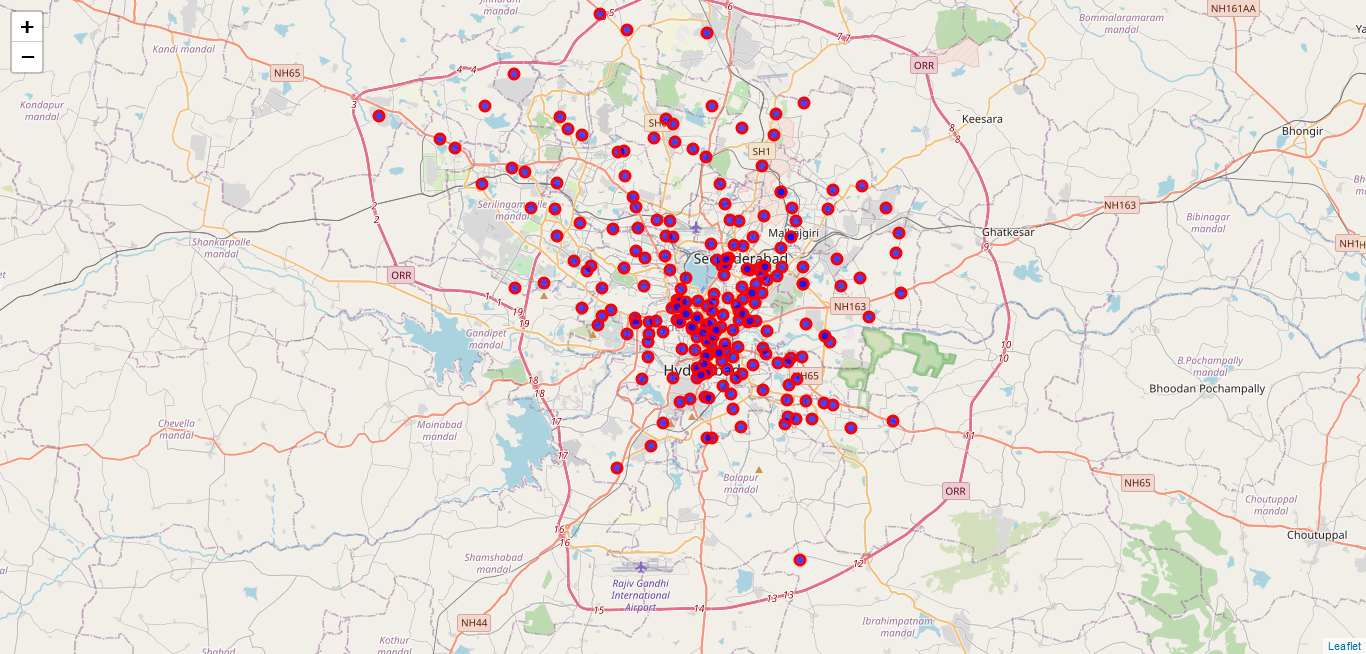

In [12]:
delay=5
tmpurl='file:///D:/Udemy/Time Series Analysis and Forecasting/Files/Files for Regression/hyd_map.html'
browser = webdriver.Firefox()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('hyd_map.png')
#Close the browser
browser.quit()
Image(filename='hyd_map.png')

#### Credentials for FourSquare API

In [13]:
CLIENT_ID = 'K5R2FO10CXLC05GBLG5BYGNKXO0DPPYCE4ZBHMFRR4YOSTMH' 
CLIENT_SECRET = 'BWY3RTCEAVAYW05KNSWWFB4WDROJ41R41Q5LPDQX4AG21SYK'
VERSION = '20180605'

#### Function to get nearby venues in a neighbourhood using FourSquare API

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        count = 1
        while count != 5:
            try:
                results = requests.get(url).json()["response"]['groups'][0]['items']
                count = 5
            except:
                count += 1
    
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Obtaining the list of venues alogn with coordinates & category, within the radius of 500m from each neighbourhood in Hyderabad

In [15]:
hyd_venues = getNearbyVenues(names = hyd_neigh['Neighbourhood'],
                                 latitudes = hyd_neigh['Latitude'],
                                 longitudes = hyd_neigh['Longitude']
                                 )

print(hyd_venues.shape)
hyd_venues.head()

(1170, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A. S. Rao Nagar,17.4112,78.50824,Srinivasa Textiles,17.407338,78.509908,Clothing Store
1,A. S. Rao Nagar,17.4112,78.50824,Reign Gym & Spa,17.407340,78.509920,Gym
2,A. S. Rao Nagar,17.4112,78.50824,Health and glow,17.407333,78.509905,Cosmetics Shop
3,A. S. Rao Nagar,17.4112,78.50824,turnhalle gym,17.407347,78.509941,Gym
4,A. S. Rao Nagar,17.4112,78.50824,Kwality Walls Express,17.407347,78.509956,Ice Cream Shop


It is observed that a total of 1170 venues were obtained.

Check number of venues in each neighbourhood

In [16]:
hyd_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
A. S. Rao Nagar,5,5,5,5,5,5
A.C. Guards,3,3,3,3,3,3
Abhyudaya Nagar,10,10,10,10,10,10
Abids,23,23,23,23,23,23
Adikmet,3,3,3,3,3,3
...,...,...,...,...,...,...
Warsiguda,2,2,2,2,2,2
Yakutpura,1,1,1,1,1,1
Yapral,1,1,1,1,1,1


We can see that the neighbourhoods, Basheerbagh, Gachobowli, HITEC city and Panjagutta have venue above 30, followed by Himayatnagar, Lakdi-ka-pul, Abids and Patny.

In [17]:
print('There are {} uniques categories of venues in Hyderabad city'.format(len(hyd_venues['Venue Category'].unique())))

There are 151 uniques categories of venues in Hyderabad city


### Analysis

Visualizing the number venues in each category in a vertical bar chart. 

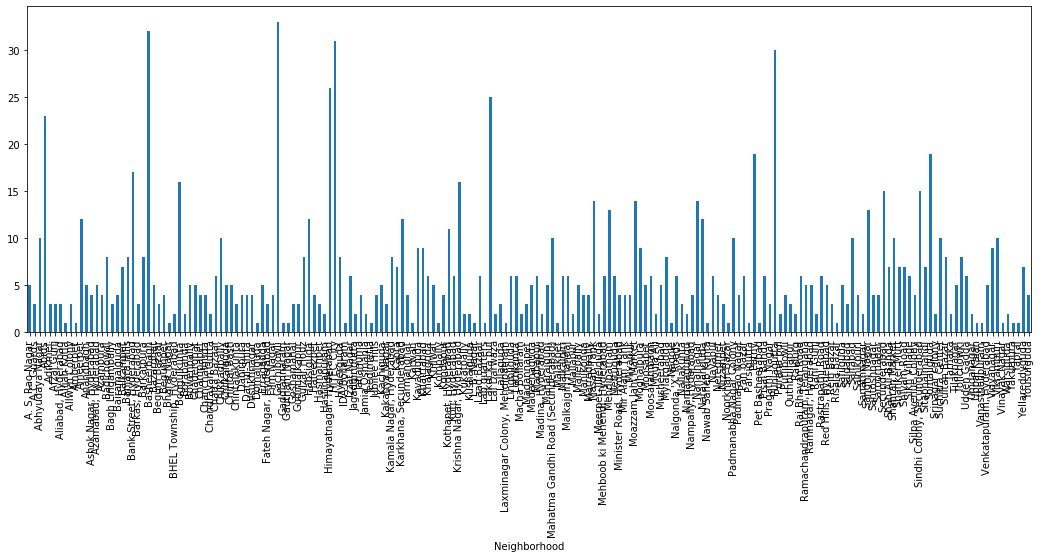

In [18]:
df = hyd_venues.groupby(['Neighborhood'], sort=False)['Venue'].count()
df.plot.bar(figsize=(18,6))

From the above bar chart, it is evident that many of the neighbourhoods are having very few venues. As such less number of venues per neighbourhood can not yeild proper results when machine learning techniques are applied, we can consider the neighbourhoods have 10 or more than 10 venues for our analysis.

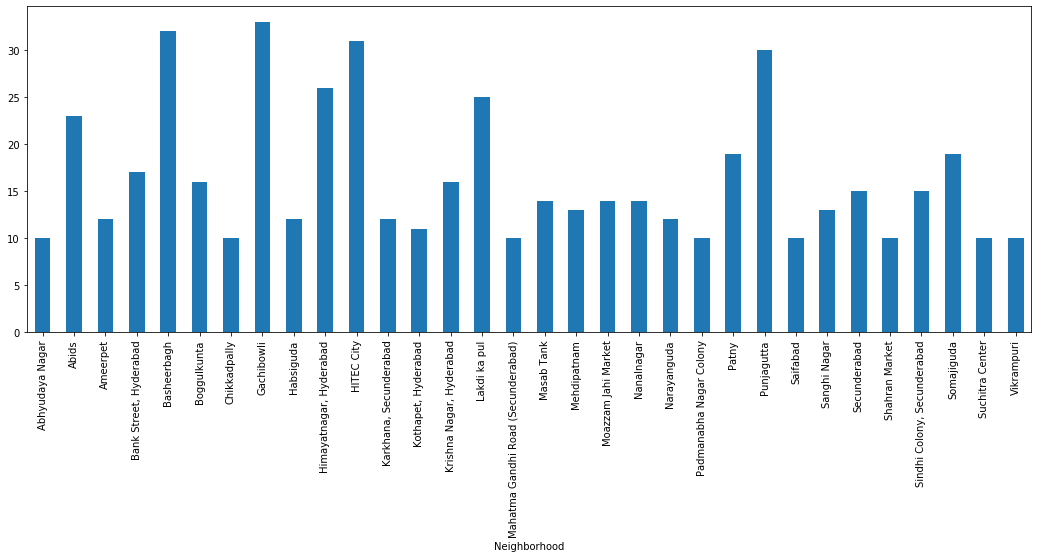

In [19]:
df = df[df >= 10]
df.plot.bar(figsize=(18,6))

Creating a new dataframe that contains only 10 or more venues.

In [20]:
hyd_venues_top = hyd_venues[hyd_venues['Neighborhood'].isin(df.index.tolist())]
hyd_venues_top.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,Abhyudaya Nagar,17.33765,78.56414,Raghavendra Tiffins,17.336733,78.565090,Restaurant
9,Abhyudaya Nagar,17.33765,78.56414,vishnu Theater,17.339045,78.565733,Movie Theater
10,Abhyudaya Nagar,17.33765,78.56414,surabhi Restaurant,17.338986,78.565894,Indian Restaurant
11,Abhyudaya Nagar,17.33765,78.56414,Hotel Sri Ragavendra Udipi,17.340049,78.564972,Hotel
12,Abhyudaya Nagar,17.33765,78.56414,Hotel swagath grand,17.338804,78.566761,Hotel


In [21]:
hyd_neigh_top_venues=hyd_venues_top[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']]
hyd_neigh_top_venues=hyd_neigh_top_venues.drop_duplicates().reset_index(drop=True)
hyd_neigh_top_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Abhyudaya Nagar,17.337650,78.564140
1,Abids,17.389800,78.476580
2,Ameerpet,17.435350,78.448610
3,"Bank Street, Hyderabad",17.388601,78.476645
4,Basheerbagh,17.402110,78.477700
5,Boggulkunta,17.391370,78.480230
6,Chikkadpally,17.403010,78.497920
7,Gachibowli,17.431810,78.386360
8,Habsiguda,17.417120,78.543500
9,"Himayatnagar, Hyderabad",17.404860,78.481210


Visualizing the neighbourhoods on Hyderbad city map after removing the neighbourhoods that have less than 10 venues

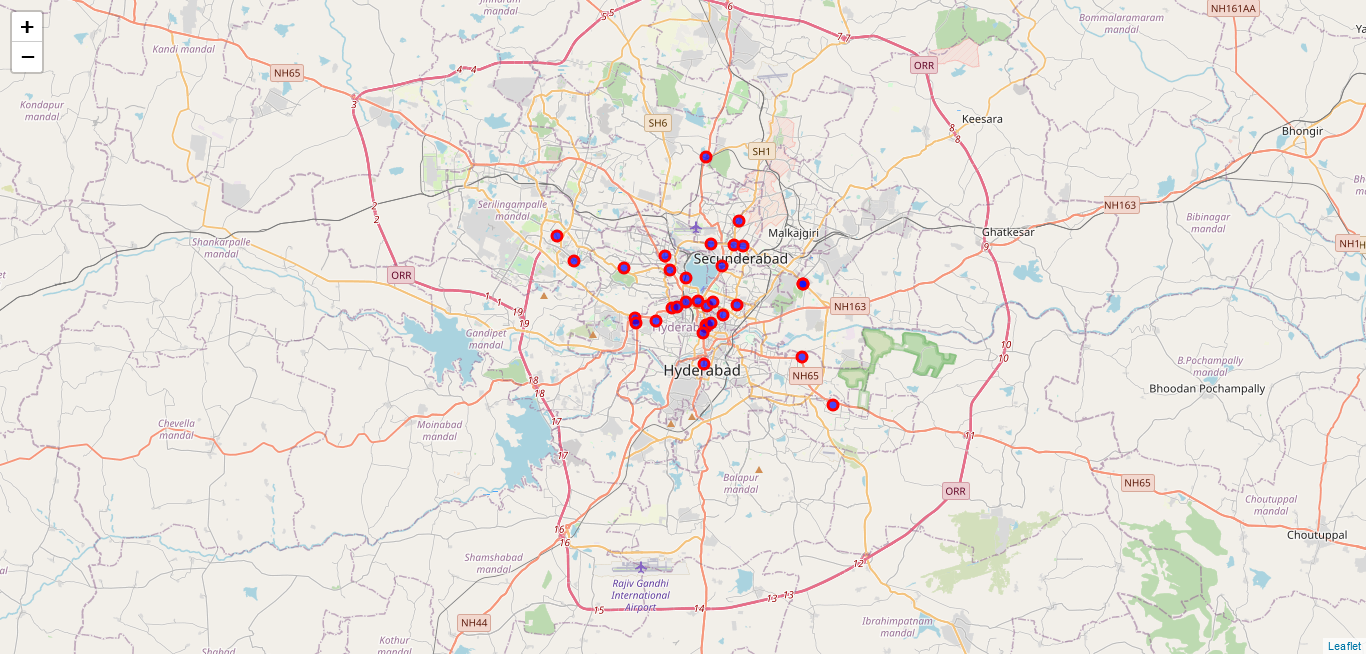

In [22]:
hyd_map_top_venues=folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, neighborhood in zip(hyd_neigh_top_venues['Neighborhood Latitude'], hyd_neigh_top_venues['Neighborhood Longitude'], hyd_neigh_top_venues['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(hyd_map_top_venues) 
hyd_map_top_venues.save('hyd_map_top_venues.html')
#Code to display the folium map as image
delay=5
tmpurl='file:///D:/Udemy/Time Series Analysis and Forecasting/Files/Files for Regression/hyd_map_top_venues.html'
browser = webdriver.Firefox()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('hyd_map_top_venues.png')
#Close the browser
browser.quit()
Image(filename='hyd_map_top_venues.png')

## Methodology <a class="anchor" id="Methodology"></a>

There are total of 225 neighbourhoods in the city of Hyderabad. A total of 1170 venues with 151 unique categories are obtained in the whole city using the FourSquare API. As many neighbourhoods have very few venues, the results may not be accurate. So, the neighbourhoods having less than 10 venues can be filtered out from our analysis, and only the neighbourhoods having 10 or more venues are used for our further analysis.

Now, one hot encoding is performed on the obtained data and get the ten most common venue categories in each neighbourhood, from that data.

Clustering technique is applied on the data containing 10 most common venue categories for each neighbourhood, to segregate the neighbourhoods of Hyderabad into separate clusters. K-Means clustering is used here to cluster the neighbourhoods. Silhouette score is used as a performance metric to obtain the optimal number of clusters.

Once the clusters are obtained, each cluster can be analysed for its existing most common venue categories. This analysis will be helpful for investors/developers to construct shopping malls, hotels etc., and small business owners to set up their restaurants, coffee shops, departmental stores etc.

#### Performing one hot encoding

In [23]:
hyd_onehot = pd.get_dummies(hyd_venues_top['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hyd_onehot['Neighborhood'] = hyd_venues_top['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = hyd_onehot.columns.tolist()
fixed_columns.insert(0, fixed_columns.pop(fixed_columns.index('Neighborhood')))
hyd_onehot = hyd_onehot.reindex(columns = fixed_columns)

print(hyd_onehot.shape)
hyd_onehot.head()

(524, 97)


,Neighborhood,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beer Garden,Bookstore,Bowling Alley,...,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Taco Place,Tea Room,Tex-Mex Restaurant,Vegetarian / Vegan Restaurant
8,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping the data

Grouping the data by neighbourhood and taking the average value of the frequency of occurence of each category.

In [24]:
hyd_grouped = hyd_onehot.groupby('Neighborhood').mean().reset_index()
print(hyd_grouped.shape)
hyd_grouped.head()

(32, 97)


,Neighborhood,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beer Garden,Bookstore,Bowling Alley,...,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Taco Place,Tea Room,Tex-Mex Restaurant,Vegetarian / Vegan Restaurant
0,Abhyudaya Nagar,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
1,Abids,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.043478,0.0,...,0.043478,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Ameerpet,0.0,0.0,0.0,0.083333,0.0,0.083333,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.083333
3,"Bank Street, Hyderabad",0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.058824,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Basheerbagh,0.0,0.0,0.0,0.031250,0.0,0.000000,0.0,0.000000,0.0,...,0.031250,0.000000,0.0,0.03125,0.0,0.0,0.0,0.0,0.0,0.000000


#### Function to return top venues of each neighbourhood

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Capturing the 10 most common venue categories in each neighbourhood and store the result into a new data frame

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hyd_grouped['Neighborhood']

for ind in np.arange(hyd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hyd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abhyudaya Nagar,Hotel,Indian Restaurant,Movie Theater,Restaurant,Department Store,Food Truck,Burger Joint,Gym / Fitness Center,Gift Shop,Diner
1,Abids,Hotel,Indian Restaurant,Juice Bar,Shoe Store,Bridal Shop,Shopping Mall,Diner,Mobile Phone Shop,Electronics Store,Fast Food Restaurant
2,Ameerpet,Indian Restaurant,Vegetarian / Vegan Restaurant,Buffet,Fast Food Restaurant,Candy Store,Diner,Department Store,Bar,Bakery,Gym
3,"Bank Street, Hyderabad",Indian Restaurant,Juice Bar,Hotel,Shoe Store,Electronics Store,Bridal Shop,Department Store,Shopping Mall,South Indian Restaurant,Mobile Phone Shop
4,Basheerbagh,Chinese Restaurant,Ice Cream Shop,Restaurant,Indian Restaurant,Gym,Hotel Bar,Dessert Shop,Café,Chaat Place,Cosmetics Shop


### Clustering

K-Means clustering technique is used to cluster the neighbourhoods. Silhouette score is chosen as a performance metric to obtain the optimal number of clusters. The number of clusters having the highest silhouette score will be optimal solution.

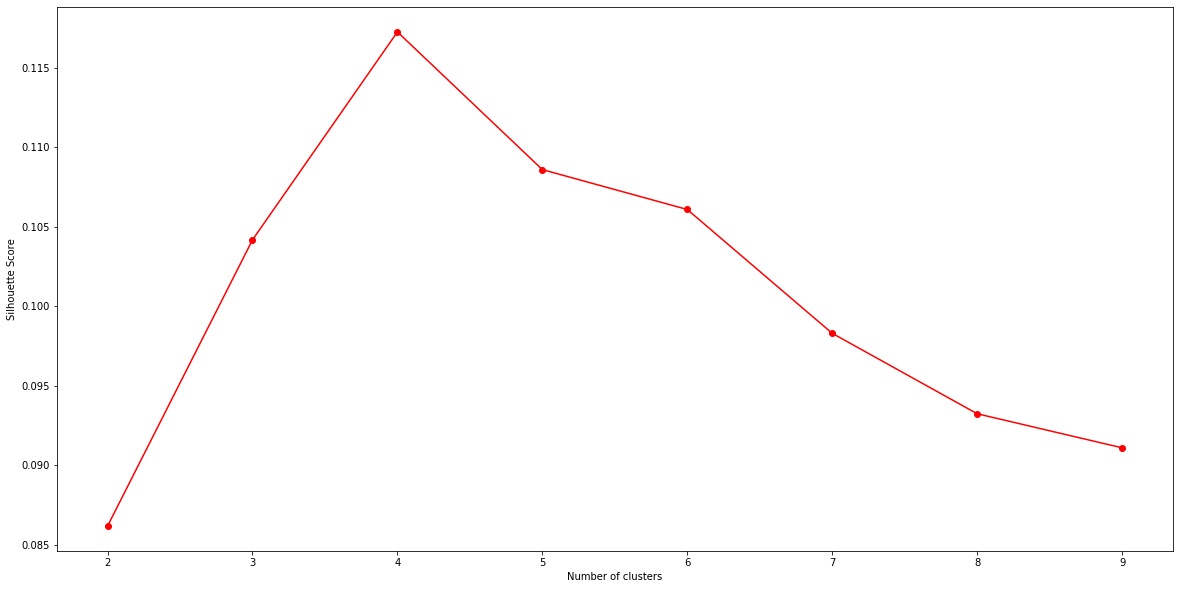

In [27]:

hyd_grouped_clustering = hyd_grouped.drop('Neighborhood', 1)

max_score = 10
scores = []

for kclusters in range(2, max_score):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(hyd_grouped_clustering)
    
    # Gets the silhouette score
    score = silhouette_score(hyd_grouped_clustering, kmeans)
    scores.append(score)

plt.figure(figsize=(20,10))
plt.plot(np.arange(2, max_score), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.show()

Based on the above plot, the optimal number of clusters, the neighbourhoods can be segregated is 4.

K-Means clustering will be performed with number of clusters as 4 and the cluster label for each neighbourhood is obtained.

In [28]:
# select best number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 1, 3, 1, 0, 3, 3, 2])

Adding clsuter labels to the data frame having 10 most common venue categories and the neighbourhood details are added as well.

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hyd_merged = hyd_venues_top[hyd_venues_top.columns[0:3]].drop_duplicates()
hyd_merged.reset_index(drop = True, inplace = True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hyd_merged = hyd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hyd_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abhyudaya Nagar,17.337650,78.564140,1,Hotel,Indian Restaurant,Movie Theater,Restaurant,Department Store,Food Truck,Burger Joint,Gym / Fitness Center,Gift Shop,Diner
1,Abids,17.389800,78.476580,1,Hotel,Indian Restaurant,Juice Bar,Shoe Store,Bridal Shop,Shopping Mall,Diner,Mobile Phone Shop,Electronics Store,Fast Food Restaurant
2,Ameerpet,17.435350,78.448610,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Buffet,Fast Food Restaurant,Candy Store,Diner,Department Store,Bar,Bakery,Gym
3,"Bank Street, Hyderabad",17.388601,78.476645,1,Indian Restaurant,Juice Bar,Hotel,Shoe Store,Electronics Store,Bridal Shop,Department Store,Shopping Mall,South Indian Restaurant,Mobile Phone Shop
4,Basheerbagh,17.402110,78.477700,3,Chinese Restaurant,Ice Cream Shop,Restaurant,Indian Restaurant,Gym,Hotel Bar,Dessert Shop,Café,Chaat Place,Cosmetics Shop


## Results & Discussion<a class="anchor" id="Results"></a>

The clusters of neighbourhoods along with 10 most common venue categories are as follows.

#### Cluster-1

In [30]:
hyd_merged.loc[hyd_merged['Cluster Labels'] == 0, hyd_merged.columns[[0] + list(range(4, hyd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ameerpet,Indian Restaurant,Vegetarian / Vegan Restaurant,Buffet,Fast Food Restaurant,Candy Store,Diner,Department Store,Bar,Bakery,Gym
6,Chikkadpally,Movie Theater,Indian Restaurant,Asian Restaurant,Ice Cream Shop,Breakfast Spot,Shopping Mall,Vegetarian / Vegan Restaurant,Food,Dive Bar,Donut Shop
12,"Kothapet, Hyderabad",Indian Restaurant,Farmers Market,Pizza Place,Bar,South Indian Restaurant,Snack Place,Indie Movie Theater,Café,Vegetarian / Vegan Restaurant,Flea Market
21,Padmanabha Nagar Colony,Indian Restaurant,Seafood Restaurant,Bakery,Hyderabadi Restaurant,Intersection,Falafel Restaurant,Department Store,Food,Diner,Dive Bar


In [31]:
cluster1 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 0, hyd_merged.columns[[0] + 
                                                                                    list(range(4, hyd_merged.shape[1]))]]
venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

print(venues1.value_counts().head(10))

Indian Restaurant                4
Vegetarian / Vegan Restaurant    3
Bar                              2
Dive Bar                         2
Bakery                           2
Diner                            2
Food                             2
Department Store                 2
South Indian Restaurant          1
Indie Movie Theater              1
dtype: int64


#### Cluster-2

In [32]:
hyd_merged.loc[hyd_merged['Cluster Labels'] == 1, hyd_merged.columns[[0] + list(range(4, hyd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abhyudaya Nagar,Hotel,Indian Restaurant,Movie Theater,Restaurant,Department Store,Food Truck,Burger Joint,Gym / Fitness Center,Gift Shop,Diner
1,Abids,Hotel,Indian Restaurant,Juice Bar,Shoe Store,Bridal Shop,Shopping Mall,Diner,Mobile Phone Shop,Electronics Store,Fast Food Restaurant
3,"Bank Street, Hyderabad",Indian Restaurant,Juice Bar,Hotel,Shoe Store,Electronics Store,Bridal Shop,Department Store,Shopping Mall,South Indian Restaurant,Mobile Phone Shop
5,Boggulkunta,Indian Restaurant,Juice Bar,Hotel,Shopping Mall,Fast Food Restaurant,Department Store,Breakfast Spot,Shoe Store,Bridal Shop,South Indian Restaurant
14,Lakdi ka pul,Hotel,Indian Restaurant,Hyderabadi Restaurant,Vegetarian / Vegan Restaurant,Breakfast Spot,Ice Cream Shop,Middle Eastern Restaurant,Coffee Shop,Performing Arts Venue,Playground
15,Mahatma Gandhi Road (Secunderabad),Hotel,Harbor / Marina,Breakfast Spot,Hotel Pool,Indian Restaurant,Resort,Hotel Bar,Bakery,Beer Garden,Fruit & Vegetable Store
22,Patny,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Shopping Mall,Metro Station,Bakery,Sports Bar,Dive Bar,Restaurant
24,Saifabad,Indian Restaurant,Arts & Crafts Store,Science Museum,Hotel,Lounge,Park,Planetarium,Scenic Lookout,Harbor / Marina,Bowling Alley
25,Sanghi Nagar,Indian Restaurant,Hyderabadi Restaurant,Hotel Bar,Chinese Restaurant,Ice Cream Shop,Grocery Store,Fruit & Vegetable Store,Middle Eastern Restaurant,Hotel,Bakery


In [33]:
cluster2 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 1, hyd_merged.columns[[0] + 
                                                                                    list(range(4, hyd_merged.shape[1]))]]
venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

print(venues2.value_counts().head(10))

Hotel                9
Indian Restaurant    9
Shopping Mall        4
Juice Bar            3
Department Store     3
Bakery               3
Shoe Store           3
Breakfast Spot       3
Bridal Shop          3
Electronics Store    2
dtype: int64


#### Cluster-3

In [34]:
hyd_merged.loc[hyd_merged['Cluster Labels'] == 2, hyd_merged.columns[[0] + list(range(4, hyd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Habsiguda,Indian Restaurant,Bakery,Restaurant,Vegetarian / Vegan Restaurant,Sandwich Place,Metro Station,Park,Beer Garden,Food,Dive Bar
16,Masab Tank,Indian Restaurant,Bakery,Hotel Bar,Café,Grocery Store,Ice Cream Shop,Fruit & Vegetable Store,Playground,Restaurant,Park
30,Suchitra Center,Restaurant,Bakery,Bar,South Indian Restaurant,Indian Restaurant,Shopping Mall,Juice Bar,Vegetarian / Vegan Restaurant,Diner,Dive Bar
31,Vikrampuri,Indian Restaurant,Restaurant,Bakery,Vegetarian / Vegan Restaurant,Sandwich Place,Park,Bar,Beer Garden,Diner,Dive Bar


In [35]:
cluster3 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 2, hyd_merged.columns[[0] + 
                                                                                    list(range(4, hyd_merged.shape[1]))]]
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

print(venues3.value_counts().head(10))

Indian Restaurant                4
Bakery                           4
Restaurant                       4
Park                             3
Dive Bar                         3
Vegetarian / Vegan Restaurant    3
Beer Garden                      2
Sandwich Place                   2
Diner                            2
Bar                              2
dtype: int64


#### Cluster-4

In [36]:
hyd_merged.loc[hyd_merged['Cluster Labels'] == 3, hyd_merged.columns[[0] + list(range(4, hyd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Basheerbagh,Chinese Restaurant,Ice Cream Shop,Restaurant,Indian Restaurant,Gym,Hotel Bar,Dessert Shop,Café,Chaat Place,Cosmetics Shop
7,Gachibowli,Shopping Mall,Indian Restaurant,Food Court,Coffee Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chocolate Shop,Clothing Store,Multiplex,Movie Theater
9,"Himayatnagar, Hyderabad",Ice Cream Shop,Fast Food Restaurant,Restaurant,Chinese Restaurant,Shoe Store,Juice Bar,Café,Business Service,Jewelry Store,Food Court
10,HITEC City,Indian Restaurant,Restaurant,Coffee Shop,Office,Fast Food Restaurant,Italian Restaurant,Bus Station,Mexican Restaurant,Pizza Place,Electronics Store
11,"Karkhana, Secunderabad",Fast Food Restaurant,Coffee Shop,Snack Place,Ice Cream Shop,Department Store,Clothing Store,Chinese Restaurant,Restaurant,Hotel,BBQ Joint
13,"Krishna Nagar, Hyderabad",Café,Ice Cream Shop,Hookah Bar,Indian Restaurant,Diner,Gym / Fitness Center,Pizza Place,Nightclub,Italian Restaurant,Food Court
17,Mehdipatnam,Fast Food Restaurant,Indian Restaurant,Hookah Bar,Pizza Place,Restaurant,Bus Station,Department Store,Juice Bar,Gym,Tea Room
18,Moazzam Jahi Market,Farmers Market,Hotel,Bookstore,Food Truck,Dessert Shop,Breakfast Spot,Indie Movie Theater,Food,Snack Place,Indian Restaurant
19,Nanalnagar,Indian Restaurant,Ice Cream Shop,Restaurant,Fast Food Restaurant,Department Store,Falafel Restaurant,Intersection,Sandwich Place,BBQ Joint,Asian Restaurant
20,Narayanguda,Snack Place,Department Store,Park,Movie Theater,Pizza Place,Gaming Cafe,Bar,Indian Restaurant,Burger Joint,Breakfast Spot


In [37]:
cluster4 = hyd_merged.loc[hyd_merged['Cluster Labels'] == 3, hyd_merged.columns[[0] + 
                                                                                    list(range(4, hyd_merged.shape[1]))]]
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']).append(
    cluster4['8th Most Common Venue']).append(
    cluster4['9th Most Common Venue']).append(
    cluster4['10th Most Common Venue']))

print(venues4.value_counts().head(10))

Indian Restaurant       12
Ice Cream Shop           7
Fast Food Restaurant     7
Restaurant               7
Pizza Place              6
Café                     6
Coffee Shop              6
Department Store         4
Sandwich Place           4
Chinese Restaurant       4
dtype: int64


Visulaizing the top 10 most common venue categories in each cluster and comparing the clusters to find the distinguishing characteristics of each cluster

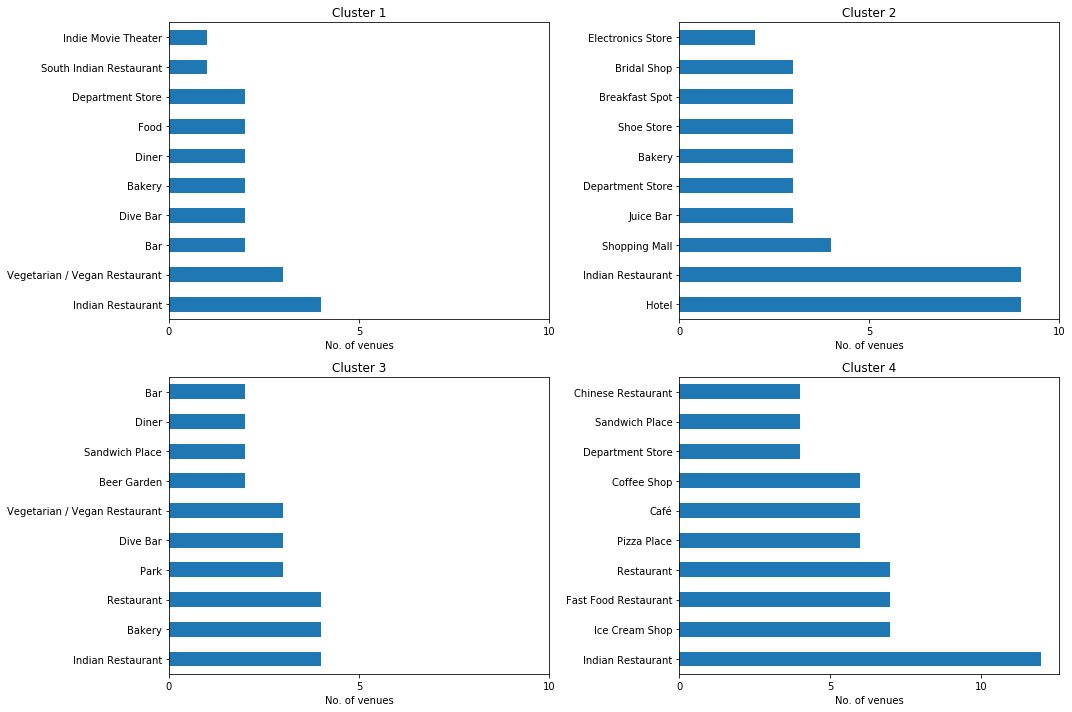

In [38]:
df_list = [venues1 ,venues2, venues3, venues4]
fig, axes = plt.subplots(2, 2)

count = 0
for r in range(2):
    for c in range(2):
        df_list[count].value_counts().head(10).plot.barh(ax = axes[r,c], width=0.5, figsize=(15,10))
        axes[r,c].set_title('Cluster {}'.format(count+1))
        plt.sca(axes[r, c])
        plt.xticks(np.arange(0, 15, 5))
        plt.xlabel('No. of venues')
        count += 1

fig.tight_layout()

The above plots shows some interesting insights which will be helpful for investors/developers and small business owners. It will help them to select an optimal location to set up their busienss. Following are few examples.

<p style='text-align: justify;'><b>1. Hotel:</b><br/>From the above plot, cluster-2 had more hotels. So, the neighbourhoods in cluster-2 are not the best locations to set up a hotel business. Cluster-1 and Cluster-3 have small number of restaurants. Where as in Cluster-4, there are enough number of restaurants and coffee shops. The optimal places to set up a hotel is where there is less competition as well as restaurants nearby. So, neighbourhoods in Cluster-4 like HITEC City, Gachibowli, Panjagutta are the best options to open a hotel.</p>

<p style='text-align: justify;'><b>2. Departmental Store or Convinient Store:</b><br/>Based on the above plots all clusters except Cluster-3 are having departmenal stores. So, if a small business owner wants to set up a departmental store, the neighbourhoods in Cluster-3, Habsiguda, Masab Tank, Suchitra and Vikrampure will be good choice. </p>

<p style='text-align: justify;'><b>3. Shopping Mall:</b><br/>Cluster-2 have 4 shopping malls, where as the remaining clusters do not have any shopping mall as the most common venue category. So, constructing a shopping mall would not be a best choice and neighbourhoods in Cluster-2 can be filtered out when selecting location to set up a shopping mall </p>

<p style='text-align: justify;'><b>4. Restaurant:</b><br/>Cluster-1 and Cluster-3 are having very few restaurants. So, if a business owner wants to open a restaurant, Cluster-1 and Cluster-3 would be good options.  </p>

<p style='text-align: justify;'><b>5. Coffee Shop:</b><br/>Cluster-4 is having many coffee shops. So, if a business owner wants to open a coffee shop, Cluster-4 will not be a good options. Cluster-2 is having more shopping places and few restaurants. So, setting up a coffee shop in Cluster-2 would be best selection to open a coffee shop. </p>

### Visualizing the neighbourhoods on the map with Cluster labels

<p style='text-align: justify;'>Below map along with the data obtained in the Results & Discussion section will be helpful for investors/developers and small business owners in selecting suitable location based on their business category.</p>

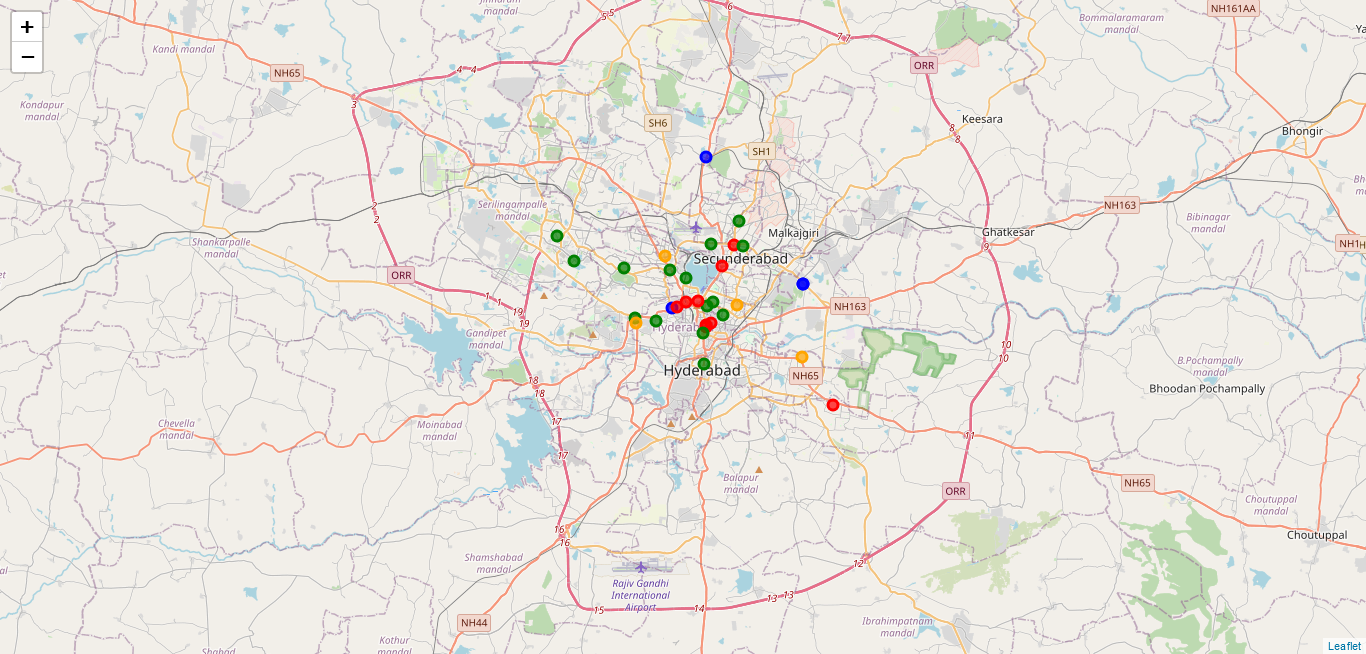

In [41]:
hyd_clusters_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
marker_colors=['red','blue','green','orange']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyd_merged['Neighborhood Latitude'], hyd_merged['Neighborhood Longitude'], hyd_merged['Neighborhood'], hyd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=marker_colors[cluster-1],
        fill=True,
        fill_color=marker_colors[cluster-1],
        fill_opacity=0.7).add_to(hyd_clusters_map)       
hyd_clusters_map.save('hyd_clusters_map.html')
#Code to display the folium map as image
delay=5
tmpurl='file:///D:/Udemy/Time Series Analysis and Forecasting/Files/Files for Regression/hyd_clusters_map.html'
browser = webdriver.Firefox()
#..that displays the map...
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
browser.save_screenshot('hyd_clusters_map.png')
#Close the browser
browser.quit()
Image(filename='hyd_clusters_map.png')

## Conclusion <a class="anchor" id="Conclusion"></a>

<p style='text-align: justify;'>This outcomes of this project can be used as tool to select the optimal location for various business. The outcomes of this project combined with other data like population expenditure, demographics, income levels, and other location data such as upcoming big real estate projects or office complexes, proximity to nearby bus or metro stations, shopping malls etc., will help business owners to select a suitable location to open their business.</p>

<p style='text-align: justify;'>One of the main drawbacks is this project is few number of venues returned by the FourSquare API. The API had returned only 1170 venues which is small for a big city like Hyderabad. For some neighbourhoods, it returned venues as few as one. As the number of venues is less, the results obtained in this project might have been skewed. The same project, if done using Google API which had more places listed, may give good results </p>